In [50]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = pd.read_parquet(
    "/beegfs/ws/0/s4610340-energy_behavior/yahor/kaggle-predict_energy_behavior_of_prosumers/data/processed/train/make_features/df_features.parquet",
    engine="fastparquet"
)

In [51]:
df_insp_p = df.loc[
    (df["county"]==0) &
    (df["product_type"]==1) &
    (df["is_business"]==1) &
    (df["is_consumption"]==0)
]
df_insp_p

,county,is_business,product_type,is_consumption,datetime,date,dayofyear,hour,day,weekday,...,target_per_eic_ratio_168_336,target_per_eic_ratio_48_216,target_per_eic_ratio_72_240,target_per_eic_ratio_48_72,target_per_eic_all_type_sum_ratio_48_72,target_per_eic_all_type_sum_ratio_168_336,target_per_eic_all_county_type_sum_ratio_48_72,target_per_eic_all_county_type_sum_ratio_168_336,is_country_holiday,target
row_id,,,,,,,,,,,,,,,,,,,,,
8,0,1,1,0,2021-09-01 00:00:00,2021-09-01,244,0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.000
130,0,1,1,0,2021-09-01 01:00:00,2021-09-01,244,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.000
252,0,1,1,0,2021-09-01 02:00:00,2021-09-01,244,2,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.000
374,0,1,1,0,2021-09-01 03:00:00,2021-09-01,244,3,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.000
496,0,1,1,0,2021-09-01 04:00:00,2021-09-01,244,4,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017710,0,1,1,0,2023-05-31 19:00:00,2023-05-31,151,19,31,3,...,1.497102,1.205626,0.955465,1.055850,0.984490,1.420730,0.842907,1.856824,False,126.947
2017840,0,1,1,0,2023-05-31 20:00:00,2023-05-31,151,20,31,3,...,0.741283,0.789721,0.775427,0.732775,0.717498,0.860545,0.851931,1.820550,False,27.563
2017970,0,1,1,0,2023-05-31 21:00:00,2023-05-31,151,21,31,3,...,0.477842,0.690716,1.403775,0.230264,0.297309,0.620147,0.528987,0.719705,False,5.091


In [53]:
def viz_weather_for_month(df, year: int, month: int):
    t_start = pd.Timestamp(year=year, month=month, day=1)
    t_end = t_start + pd.DateOffset(months=1)
    df = df.loc[
        (df["datetime"] > t_start) &
        (df["datetime"] < t_end)
    ]
    
    fig = make_subplots(cols=1, rows=5, subplot_titles=["Temperature", "Rain", "Snowfall", "I"])
    
    # Temperature
    fig.add_trace(
        go.Scatter(x=df["datetime"], y=df["temperature_forecast"], marker_color="blue", name="forecast", legendgroup=1),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter(x=df["datetime"], y=df["temperature_historical"], marker_color="red", name="historical", legendgroup=2),
        row=1, col=1
    )

    # Rain
    fig.add_trace(
        go.Scatter(x=df["datetime"], y=df["rain_forecast"], marker_color="blue", name="forecast", legendgroup=1, showlegend=False),
        row=2, col=1
    )
    fig.add_trace(
        go.Scatter(x=df["datetime"], y=df["rain_historical"], marker_color="red", name="historical", legendgroup=2, showlegend=False),
        row=2, col=1
    )

    # Snow
    fig.add_trace(
        go.Scatter(x=df["datetime"], y=df["snowfall_forecast"], marker_color="blue", name="forecast", legendgroup=1, showlegend=False),
        row=3, col=1
    )
    fig.add_trace(
        go.Scatter(x=df["datetime"], y=df["snowfall_historical"], marker_color="red", name="historical", legendgroup=2, showlegend=False),
        row=3, col=1
    )

    # I
    fig.add_trace(
        go.Scatter(x=df["datetime"], y=df["surface_solar_radiation_downwards_forecast"], marker_color="blue", name="forecast", legendgroup=1, showlegend=False),
        row=4, col=1
    )

    fig.update_layout(height=800)

    return fig
viz_weather_for_month(df_insp_p, 2023, 5)

In [54]:
viz_weather_for_month(df_insp_p, 2023, 4)

In [55]:
viz_weather_for_month(df_insp_p, 2023, 3)

In [56]:
viz_weather_for_month(df_insp_p, 2023, 2)

In [36]:
df_sn = df.loc[(df["snowfall_historical"] > df["snowfall_historical"].quantile(0.9)) & (df["snowfall_forecast"] > df["snowfall_forecast"].quantile(0.9))] 
swe_mm = df_sn["snowfall_forecast"] * 1000
print(swe_mm.describe())
H_s_cm = df_sn["snowfall_historical"]

count    156516.000000
mean          0.298595
std           0.277510
min           0.060526
25%           0.124055
50%           0.208264
75%           0.363892
max           2.927283
Name: snowfall_forecast, dtype: float64


In [37]:
from scipy.optimize import minimize, curve_fit
import numpy as np
from sklearn.metrics import mean_absolute_error
f_0 = lambda swe_m, k: k * swe_m
popt, pcov = curve_fit(f_0, swe_mm, H_s_cm, p0=(0.03), bounds=[(0,), (np.inf, )])
popt

array([0.42424553])

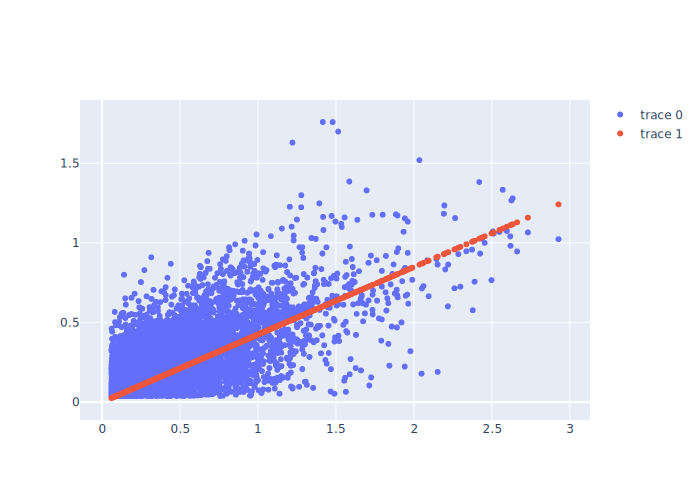

In [38]:
fig = go.Figure([
    go.Scattergl(
        x=swe_mm,
        y=H_s_cm,
        mode="markers"
    ),
    go.Scattergl(
        x=swe_mm,
        y=f_0(swe_mm, *popt),
        mode="markers"
    ),
])
fig.show(renderer="svg")